# Fit fidelity & analysis
22/06/21

Here we'll look in detail at a batch of fit results (see the batch run notebook for initial setup & running fits), and stats.

TODO: final uncertainty analysis, bootstrapping and testing with noise etc.

## Batch results

Generally, there are many things to consider in terms of the quality/fidelity of the fit results. In particular, we might want to investigate:

- $\chi^2$ values.
- Estimated uncertainties.
- Uniqueness of fit.

This is generally aided by having a large batch of fit results, with randomised initial parameters, to allow for statistical analysis and ensure a full probing of the solution hyper-space.


For further discussion, see, for example:

<div class="csl-bib-body" style="line-height: 1.35; ">
  <div class="csl-entry" style="clear: left; ">
    <div class="csl-left-margin" style="float: left; padding-right: 0.5em;text-align: right; width: 1em;">[1]</div><div class="csl-right-inline" style="margin: 0 .4em 0 1.5em;">P. Hockett, <i>Quantum Metrology with Photoelectrons, Volume 2: Applications and advances</i>. IOP Publishing, 2018. doi: <a href="https://doi.org/10.1088/978-1-6817-4688-3">10.1088/978-1-6817-4688-3</a>.</div>
  </div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=urn%3Aisbn%3A978-1-68174-688-3&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Quantum%20Metrology%20with%20Photoelectrons%2C%20Volume%202%3A%20Applications%20and%20advances&amp;rft.publisher=IOP%20Publishing&amp;rft.aufirst=Paul&amp;rft.aulast=Hockett&amp;rft.au=Paul%20Hockett&amp;rft.date=2018&amp;rft.isbn=978-1-68174-688-3"></span>
  <div class="csl-entry" style="clear: left; ">
    <div class="csl-left-margin" style="float: left; padding-right: 0.5em;text-align: right; width: 1em;">[2]</div><div class="csl-right-inline" style="margin: 0 .4em 0 1.5em;">P. Hockett, “Photoionization dynamics of polyatomic molecules,” University of Nottingham, 2009. Available: <a href="http://eprints.nottingham.ac.uk/10857/">http://eprints.nottingham.ac.uk/10857/</a></div>
  </div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adissertation&amp;rft.title=Photoionization%20dynamics%20of%20polyatomic%20molecules&amp;rft.aufirst=Paul&amp;rft.aulast=Hockett&amp;rft.au=Paul%20Hockett&amp;rft.date=2009"></span>
</div>

### Load sample dataset

In [1]:
# If running from scratch, create a blank object first
# # Init blank object
import pemtk as pm
from pemtk.fit.fitClass import pemtkFit
data = pemtkFit()

*** ePSproc installation not found, setting for local copy.


In [2]:
# Load sample dataset
# Full path to the file may be required here, in repo/demos/fitting
import pickle
from pathlib import Path

dataFile = 'dataDump_100fitTests_10t_randPhase_130621.pickle'
dataPath = Path(pm.__path__[0]).parent/Path('demos','fitting')

with open( dataPath/dataFile, 'rb') as handle:
    data.data = pickle.load(handle)

In [3]:
# The sample data dictionary contains 100 fits, as well as the data used to set things up.
data.data.keys()

dict_keys(['orb6', 'orb5', 'ADM', 'pol', 'subset', 'sim', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
# Set max fit ind for reference
data.fitInd = 99

# Set reference values from input matrix elements (data.data['subset']['matE'])
data.setMatEFit()

Set 6 complex matrix elements to 12 fitting params, see self.params for details.


Parameters([('m_PU_SG_PU_1_n1_1',
             <Parameter 'm_PU_SG_PU_1_n1_1', value=1.784615753610107, bounds=[0.0001:5.0]>),
            ('m_PU_SG_PU_1_1_n1',
             <Parameter 'm_PU_SG_PU_1_1_n1', value=1.784615753610107, bounds=[0.0001:5.0]>),
            ('m_PU_SG_PU_3_n1_1',
             <Parameter 'm_PU_SG_PU_3_n1_1', value=0.802904951323892, bounds=[0.0001:5.0]>),
            ('m_PU_SG_PU_3_1_n1',
             <Parameter 'm_PU_SG_PU_3_1_n1', value=0.802904951323892, bounds=[0.0001:5.0]>),
            ('m_SU_SG_SU_1_0_0',
             <Parameter 'm_SU_SG_SU_1_0_0', value=2.686062120382649, bounds=[0.0001:5.0]>),
            ('m_SU_SG_SU_3_0_0',
             <Parameter 'm_SU_SG_SU_3_0_0', value=1.109153108617096, bounds=[0.0001:5.0]>),
            ('p_PU_SG_PU_1_n1_1',
             <Parameter 'p_PU_SG_PU_1_n1_1', value=-0.8610414024232179 (fixed), bounds=[-3.141592653589793:3.141592653589793]>),
            ('p_PU_SG_PU_1_1_n1',
             <Parameter 'p_PU_SG_PU_1_1_n1', value=-0.8610414024232179, bounds=[-3.141592653589793:3.141592653589793]>),
            ('p_PU_SG_PU_3_n1_1',
             <Parameter 'p_PU_SG_PU_3_n1_1', value=-3.1204444620772467, bounds=[-3.141592653589793:3.141592653589793]>),
            ('p_PU_SG_PU_3_1_n1',
             <Parameter 'p_PU_SG_PU_3_1_n1', value=-3.1204444620772467, bounds=[-3.141592653589793:3.141592653589793]>),
            ('p_SU_SG_SU_1_0_0',
             <Parameter 'p_SU_SG_SU_1_0_0', value=2.611229196458127, bounds=[-3.141592653589793:3.141592653589793]>),
            ('p_SU_SG_SU_3_0_0',
             <Parameter 'p_SU_SG_SU_3_0_0', value=-0.07867827542158025, bounds=[-3.141592653589793:3.141592653589793]>)])

### Process results

Here we'll use [Seaborn](https://seaborn.pydata.org/) and [Holoviews](http://holoviews.org/) to look at the fit results outputs from lmfit; for this, the results will first be restacked to a long-form [Pandas](https://pandas.pydata.org/) data-frame.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
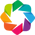

In [5]:
# Additional import for data analysis
import xarray as xr
import numpy as np
import pandas as pd
import string

# pd.options.display.max_rows = 50
pd.set_option("display.max_rows", 50)

# For AFBLM > PD conversion
import epsproc as ep

# For plotting
import seaborn as sns
import holoviews as hv
from holoviews import opts

# Some additional default plot settings
# TODO: should set versino for PEMtk, just sets various default plotters & HV backends.
from epsproc.plot import hvPlotters
hvPlotters.setPlotters()


In [6]:
# The converter currently returns directly, not to the class.
dfLong, dfRef = data.pdConv()

In [7]:
# The long-format data includes per fit and per parameter data
dfLong

value      stderr   vary               expr            Param  \
Fit Type pn                                                                    
0   m    0    1.89405  0.00952422  False  m_PU_SG_PU_1_1_n1  PU_SG_PU_1_n1_1   
         1    1.89405  0.00952422   True               None  PU_SG_PU_1_1_n1   
         2   0.489781   0.0369748  False  m_PU_SG_PU_3_1_n1  PU_SG_PU_3_n1_1   
         3   0.489781   0.0369748   True               None  PU_SG_PU_3_1_n1   
         4    2.57267   0.0125781   True               None   SU_SG_SU_1_0_0   
...               ...         ...    ...                ...              ...   
98  p    7    2.46926     23279.8   True               None  PU_SG_PU_1_1_n1   
         8     0.1535     23279.8  False  p_PU_SG_PU_3_1_n1  PU_SG_PU_3_n1_1   
         9     0.1535     23279.8   True               None  PU_SG_PU_3_1_n1   
         10  -1.04185     23279.8   True               None   SU_SG_SU_1_0_0   
         11   2.14965     23279.8   True               None   SU_SG_SU_3_0_0   

            success       chisqr       redchi  
Fit Type pn                                    
0   m    0     True  9.83239e-05  5.25796e-07  
         1     True  9.83239e-05  5.25796e-07  
         2     True  9.83239e-05  5.25796e-07  
         3     True  9.83239e-05  5.25796e-07  
         4     True  9.83239e-05  5.25796e-07  
...             ...          ...          ...  
98  p    7     True  0.000136565  7.30294e-07  
         8     True  0.000136565  7.30294e-07  
         9     True  0.000136565  7.30294e-07  
         10    True  0.000136565  7.30294e-07  
         11    True  0.000136565  7.30294e-07  

[1188 rows x 8 columns]

For the fit/model results (AF-$\beta_{LM}$ parameters), the output is an [Xarray](http://xarray.pydata.org/) per fit, these can be stacked to a dataset for batched analysis.

In [8]:
# Stack fits to Xarrays
# Don't recall the best way to do this - here pass to list then stack directly

# AFstack = xr.DataArray()
AFstack = []

for n in range(0, data.fitInd):
    AFstack.append(data.data[n]['AFBLM'].expand_dims({'Fit':[n]})) # NOTE [n] here, otherwise gives length not coord
                                                                   # http://xarray.pydata.org/en/stable/generated/xarray.DataArray.expand_dims.html

AFxr = xr.concat(AFstack,'Fit')

... and further convert to Pandas for Seaborn plotting...

In [9]:
AFpd, AFxrRS = ep.multiDimXrToPD(AFxr.squeeze().pipe(np.abs), colDims=['t'], 
                                 thres = 1e-4, fillna=True)

AFpdLong = AFpd.reset_index().melt(id_vars=['Fit','l','m'])  # This works for pushing to full long-format with col by t

AFpdLong

Fit  l  m     t     value
0       0  0  0  4.02  1.668968
1       0  2  0  4.02  0.924928
2       0  4  0  4.02  0.147711
3       0  6  0  4.02  0.007405
4       1  0  0  4.02  1.668803
...   ... .. ..   ...       ...
5143   97  6  0  4.96  0.010057
5144   98  0  0  4.96  1.599609
5145   98  2  0  4.96  0.947416
5146   98  4  0  4.96  0.088204
5147   98  6  0  4.96  0.009020

[5148 rows x 5 columns]

## Quick overviews

Panda's `describe()` method gives some summary details, which may (or may not) be useful here.

In [10]:
dfLong.describe()

value        stderr  vary               expr           Param  \
count   1188.000000   1116.000000  1188                396            1188   
unique   790.000000   1116.000000     2                  4               6   
top        3.141593  47132.056337  True  m_PU_SG_PU_3_1_n1  SU_SG_SU_3_0_0   
freq       3.000000      1.000000   792                 99             198   

       success       chisqr        redchi  
count     1188  1188.000000  1.188000e+03  
unique       2    99.000000  9.900000e+01  
top       True     0.000098  7.302939e-07  
freq      1176    12.000000  1.200000e+01

### $\chi^2$

Any datatype (column) can be plotted... here are the $\chi^2$ histograms (note the frquencies are currently per parameter, not per fit, here).

<AxesSubplot:>

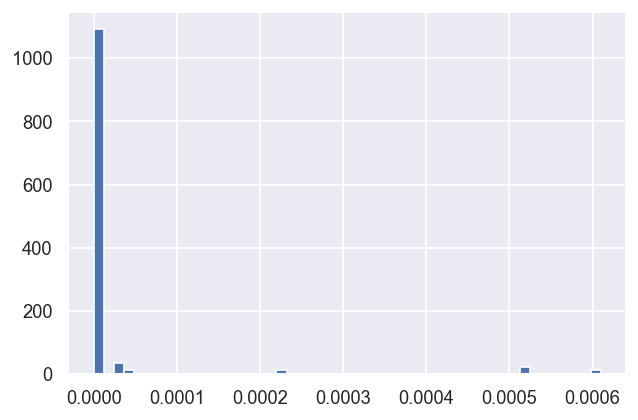

In [11]:
dfLong['redchi'].hist(bins=50)  # Plot redchi histogram - note this currently reports fits x params values.
# dfLong.hist(column='redchi', by='Fit')  # Should work for per-fit results, but not currently.

<AxesSubplot:>

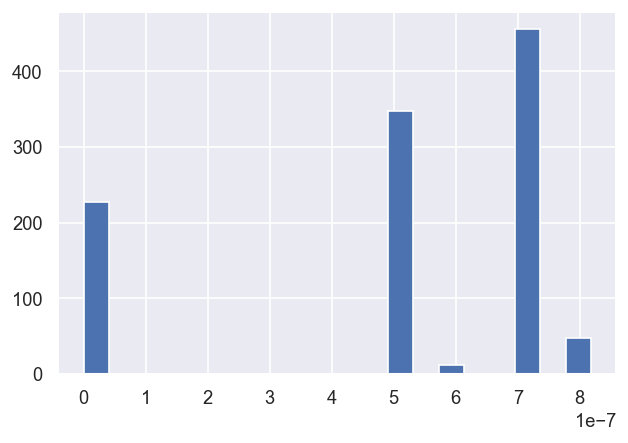

In [12]:
# Zoom in on the lowest set via a selection mask

mask = dfLong['redchi']<1e-5

dfLong['redchi'][mask].hist(bins=20)

In [13]:
# Interactive version with Holoviews - scatter plot + histograms
# For additional control, calculate histograms first, then use hv.Histogram()
# See http://holoviews.org/reference/elements/bokeh/Histogram.html
hv.Scatter(dfLong['redchi'][mask].reset_index(), kdims='redchi').hist(dimension=['redchi','Fit'])

:AdjointLayout
   :Scatter   [redchi]   (Fit,Type,pn)
   :Histogram   [Fit]   (Fit_frequency)
   :Histogram   [redchi]   (redchi_frequency)

In this case, it looks like three $\chi^2$ groupings (local minima) are consistently found, suggesting three good fit candidate parameter sets, with possibly another two rare candidates.

For easy reference later, these can be categorised in the data table:

<AxesSubplot:>

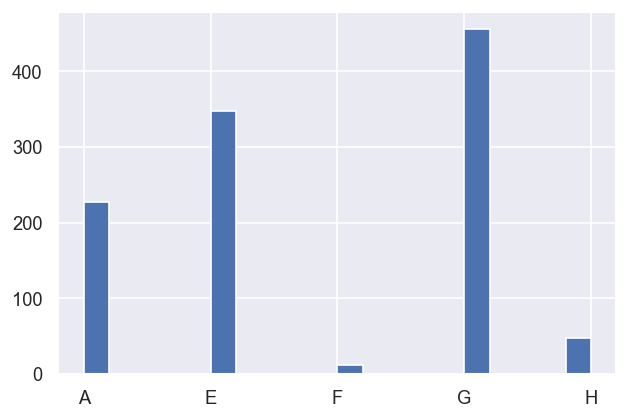

In [14]:
# Set groupings and label by letter
dfLong['pGroups'] = pd.cut(dfLong['redchi'], bins = np.linspace(0,1e-6,10), labels = list(string.ascii_uppercase[0:9]))

# Check result - note this is ordered by first appearance in the dataFrame, unless sorted first. Also NaNs are dropped.
dfLong['pGroups'][mask].sort_values().hist(bins=20)

### Testing local and global minimum candidates

We can look more carefully by looking at the unique values within a group...

In [15]:
# mask = dfLong['redchi']<3e-7
mask = dfLong['pGroups'] == 'A'

# Tabulate
print(f"Total results: {mask.sum()}, unique values: {dfLong['redchi'][mask].unique().size}")
print(dfLong['redchi'][mask].unique())

# Plot
# hv.Curve(dfLong['redchi'][mask].unique()) # Linear scale
hv.Curve(dfLong['redchi'][mask].apply(lambda x: np.log10(x)).unique())  # Log10 scale



Total results: 228, unique values: 19
[1.2604134959527601e-18 5.3106194674890043e-20 4.303597576031393e-18
 2.494886350900348e-14 1.7186846944721688e-18 8.259039836499798e-19
 1.7837416345305325e-20 1.4191997193877506e-20 7.204261384699086e-19
 7.760645030848521e-21 5.393095140259509e-28 3.345117650051837e-16
 3.7633462560795635e-22 1.5760735489756745e-22 2.469959625269985e-09
 3.4643812630697878e-22 5.7835502902223365e-24 1.2442220028745357e-18
 7.6046693509239e-23]


:Curve   [x]   (y)

For this group, the candidate parameter sets typically give orders of magnitude lower $\chi^2$ than the higher groups, so this group is likely a genuine global minimum in the solution space. This will be investigated further below. (Note that, in this demo case where a "perfect" fit is possible, very low $\chi^2$ values like this might be expected; more generally, with real/noisy/imperfect datasets, there may not be such an obvious "best fit" parameter grouping.)

### Per-fit data spread & correlations

Returning to the full batch of results, it is also useful to look at the spread and potential correlations of the paramters themselves.

In [16]:
# For per-fit analysis, set also a "wide" format table
dfWide = dfLong.reset_index().pivot_table(columns = 'Param', values = ['value'], index=['Fit','Type','pGroups'],aggfunc=np.sum)

dfWide

value                                  \
Param            PU_SG_PU_1_1_n1 PU_SG_PU_1_n1_1 PU_SG_PU_3_1_n1   
Fit Type pGroups                                                   
0   m    E              1.894049        1.894049        0.489781   
    p    E             -3.059175       -3.059175       -0.673191   
1   m    G              1.582893        1.582893        1.150754   
    p    G              2.822310        2.822310       -1.145108   
2   m    G              1.582889        1.582889        1.150759   
...                          ...             ...             ...   
96  p    E             -2.675860       -2.675860        1.221342   
97  m    E              1.894049        1.894049        0.489781   
    p    E              3.038308        3.038308        0.652325   
98  m    G              1.582888        1.582888        1.150761   
    p    G              2.469261        2.469261        0.153500   

                                                                
Param            PU_SG_PU_3_n1_1 SU_SG_SU_1_0_0 SU_SG_SU_3_0_0  
Fit Type pGroups                                                
0   m    E              0.489781       2.572670       1.352896  
    p    E             -0.673191      -0.763252       3.120775  
1   m    G              1.150754       2.710144       1.048704  
    p    G             -1.145108       0.050245      -3.141212  
2   m    G              1.150759       2.710143       1.048707  
...                          ...            ...            ...  
96  p    E              1.221342       1.311402      -2.572625  
97  m    E              0.489781       2.572669       1.352897  
    p    E              0.652325       0.742385       3.141543  
98  m    G              1.150761       2.710142       1.048709  
    p    G              0.153500      -1.041850       2.149648  

[182 rows x 6 columns]

C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


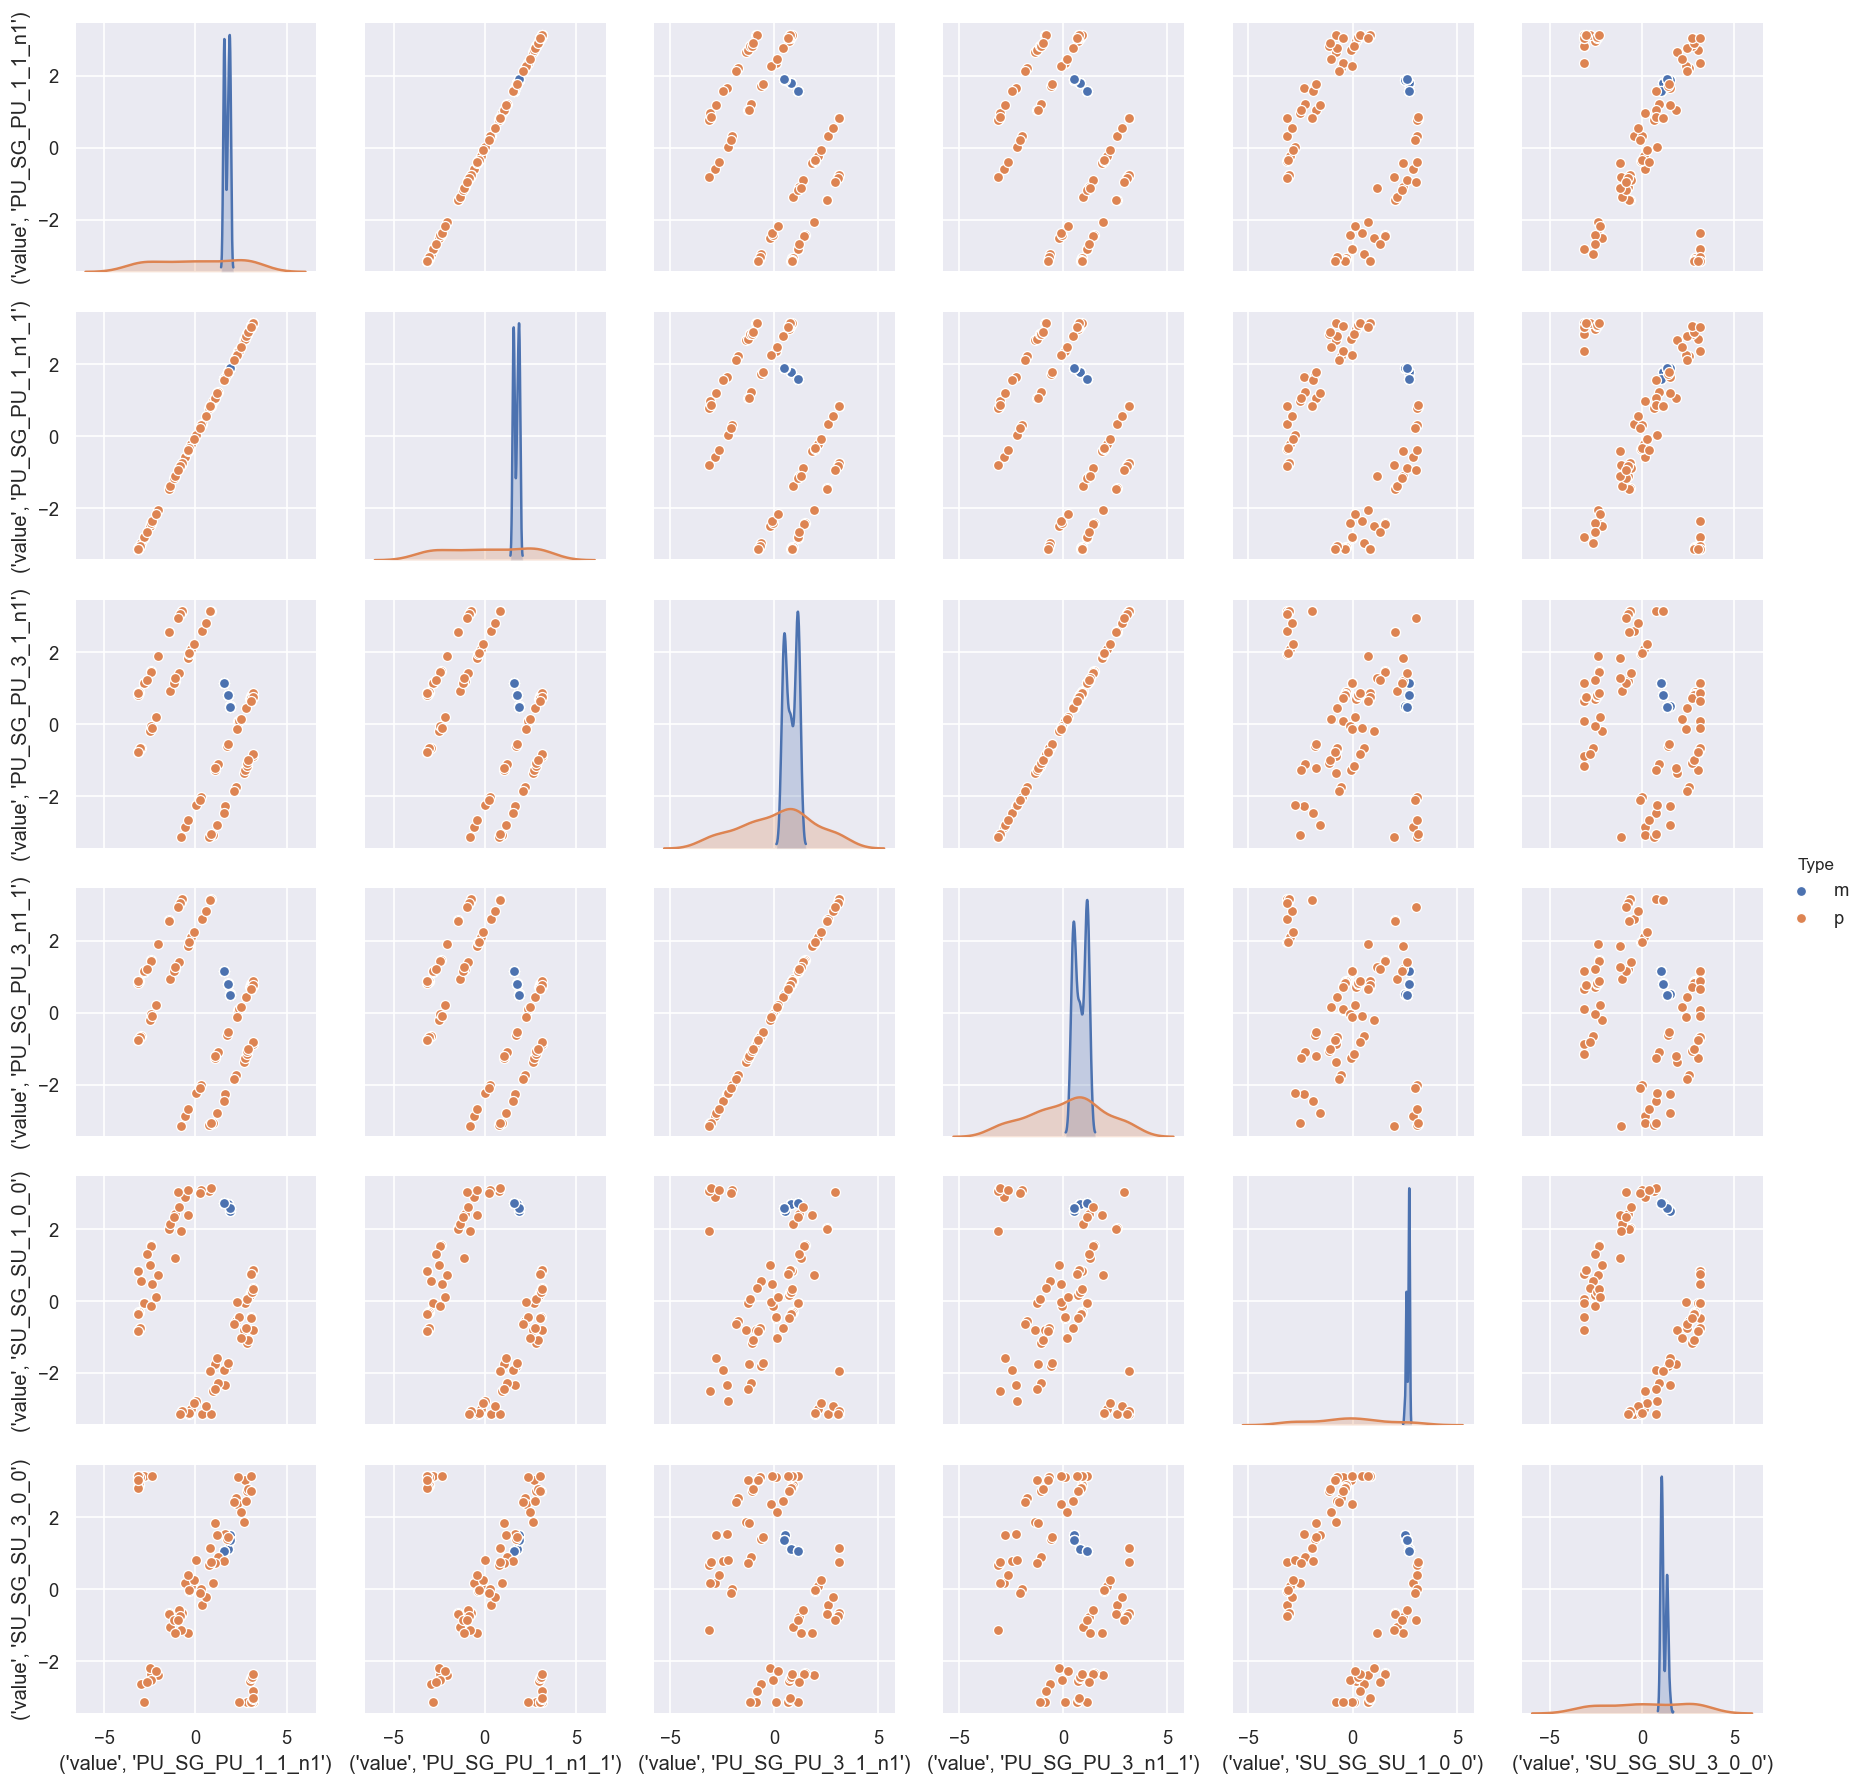

In [17]:
# Look at parameter correlations

sns.pairplot(dfWide.reset_index().drop('Fit', axis=1), hue='Type') # Drop Fit #

This indicates that there is generally a good (narrow) distirbution of magnitudes (m) in the batch of results, but the phases (p) are broadly distributed, although appear to be strongly correlated.

In this case, this is (somewhat) expected, since the reference phase was also randomised per fit... here the correlations are interesting however, since this indicates that (as we might hope) the *relative* phases are well-defined.

<AxesSubplot:>

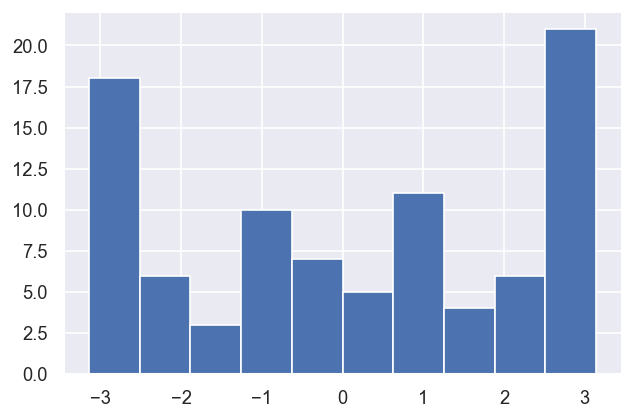

In [18]:
dfWide['value','PU_SG_PU_1_n1_1'].xs('p',level=1).hist()

C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


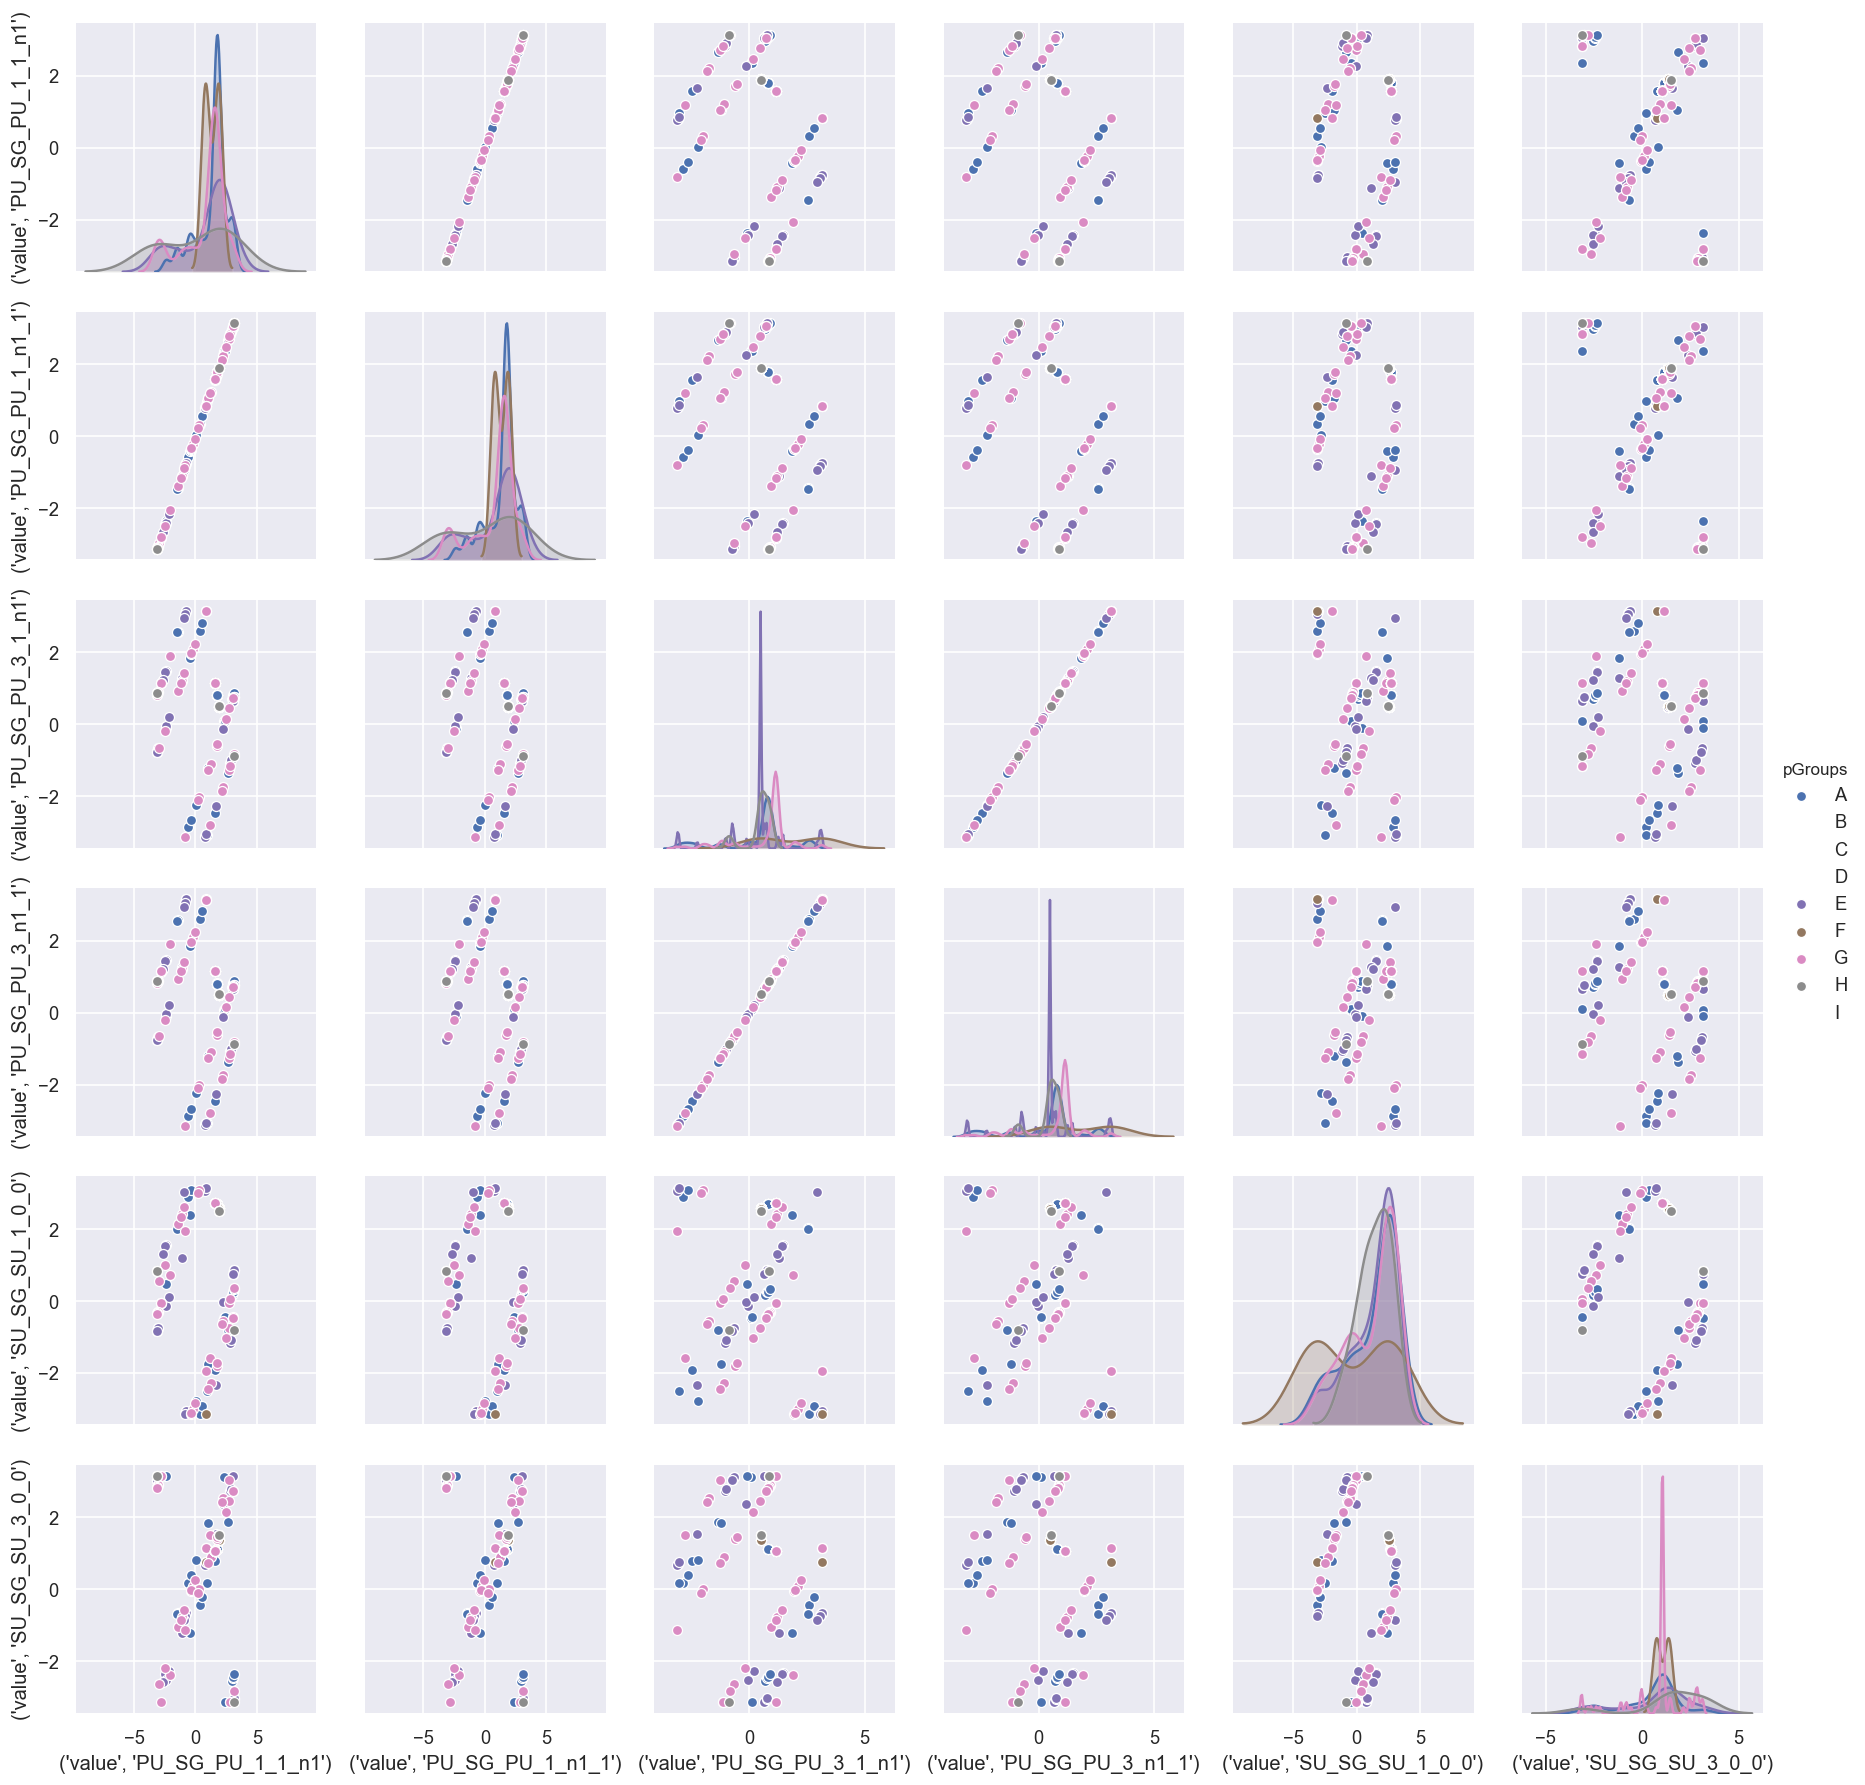

In [19]:
# We can further group or filter by the defined candidate parameter sets
# sns.pairplot(dfWide.xs('m',level=1).reset_index().drop('Fit', axis=1), hue='pGroups') # Drop Fit, magnitudes only
sns.pairplot(dfWide.reset_index().drop('Fit', axis=1), hue='pGroups')

There's a lot going on in this visualisation, but - broadly speaking - it is quite clear that the main distributions (diagonal) are group-dependent.

### Model results

For each fit, the model output (AF-$\beta_{LM}$ parameter) can also be investigated...

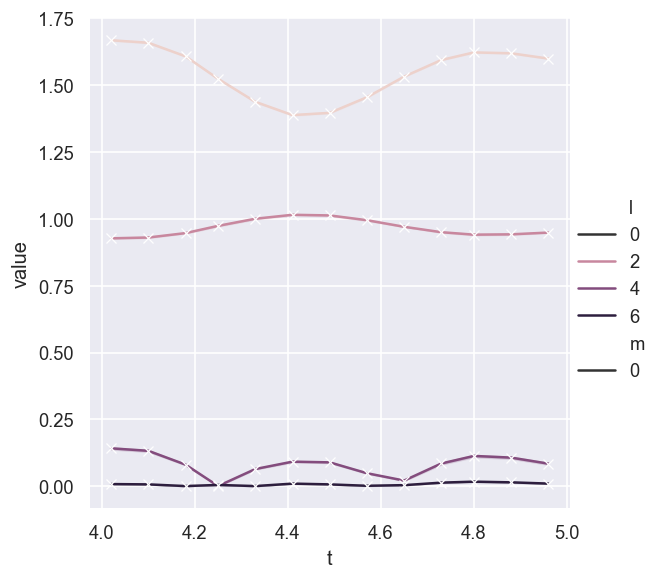

In [21]:
# If Fit not mapped to style/size etc. it gives error bar
# More details at https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty
sns.relplot(data = AFpdLong, x='t', y='value', hue='l', style='m', kind='line', marker = 'x') 

# No error bar with this dataset?  Odd - worked in testing. Maybe only a couple of outliers/bad fits?

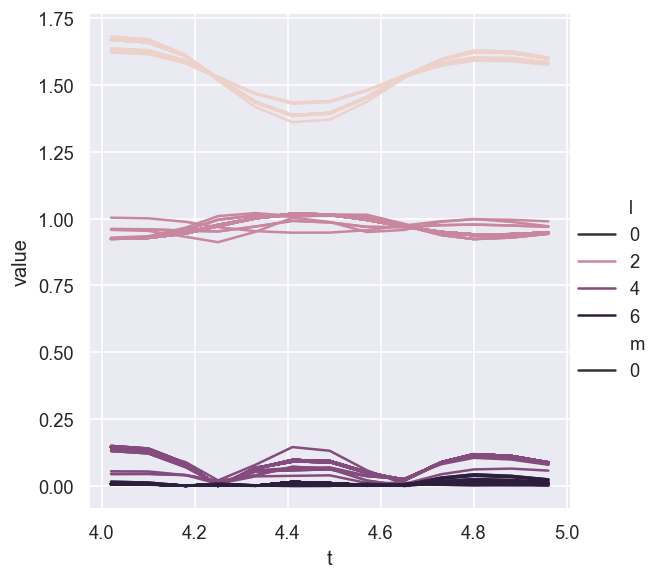

In [22]:
# Without aggregation and groupby Fit - this will likely make sense where there is a lot to show!
sns.relplot(data = AFpdLong, x='t', y='value', hue='l', style="m", estimator=None, units="Fit", kind='line') 

In [23]:
# Add pGroups to the AFBLM listing to allow for sub-selection...

# Fit > pGroups mapping, from https://stackoverflow.com/questions/58025433/drop-duplicates-based-on-first-level-column-in-multiindex-dataframe
# dfLong.reset_index().loc[dfLong.reset_index()['Fit'].drop_duplicates().index]
dfFits = dfLong.reset_index().loc[dfLong.reset_index()['Fit'].drop_duplicates().index].set_index('Fit')
AFpdLong = AFpdLong.merge(dfFits['pGroups'].reset_index(), on='Fit', how='left')

# Could also try as a mapping with a dict, https://datascience.stackexchange.com/questions/39773/mapping-column-values-of-one-dataframe-to-another-dataframe-using-a-key-with-dif
# Should be other ways too, maybe with multiindex slices?

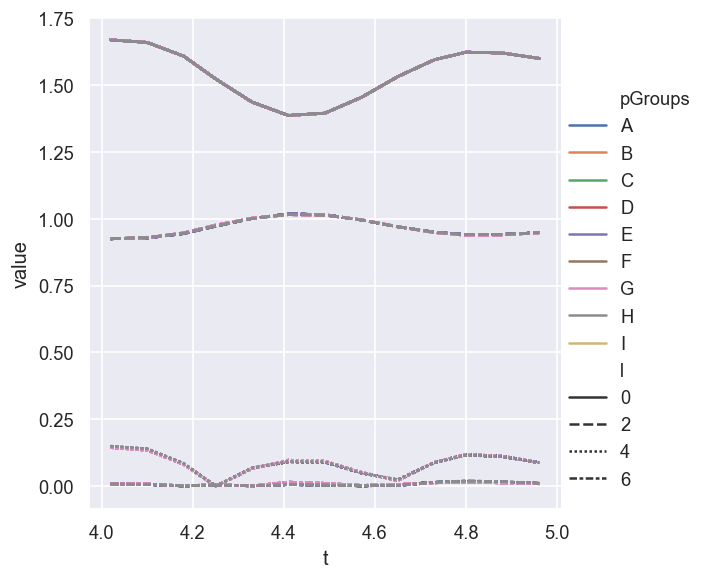

In [24]:
# Without aggregation and groupby Fit, hue by pGroups
sns.relplot(data = AFpdLong, x='t', y='value', hue='pGroups', style="l", estimator=None, units="Fit", kind='line')
# sns.relplot(data = AFpdLong, x='t', y='value', hue='pGroups', style="l", estimator=None, units="pGroups", kind='line')
# sns.relplot(data = AFpdLong, x='t', y='value', hue='pGroups', style="l", kind='line')

In this case - where only the best fits are assigned to groups - there is little to see or choose from!

NOTE: some work to do on the manipulation & plotting here.

## Parameter estimation & fidelity

For the test case we can, of course, compare the fit results to the known input parameters. This should give a feel for how well the data defines the matrix elements (parameters) in this case...

<AxesSubplot:xlabel='Param', ylabel='value'>

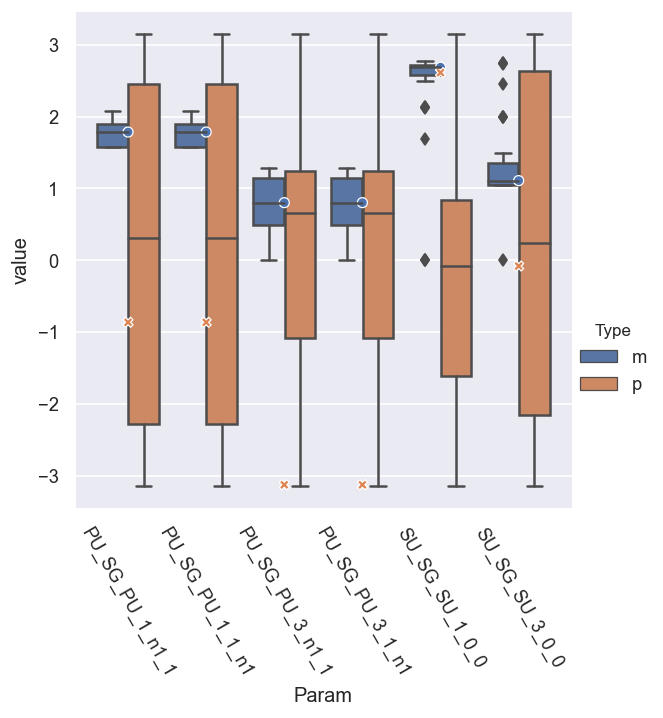

In [25]:
# For multiindex case, above code throw missing data (columns) errors, but seems OK with a reset_index()
# This basically forces the indexs to long format.
g = sns.catplot(x='Param', y='value', hue = 'Type', data = dfLong.reset_index(), kind='box')
g.set_xticklabels(rotation=-60)

# Add ref case
sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)

This indicates that most of the magnitudes are well-defined, with a fairly low spread of values, and averages right at the reference values, but - as per note above - the (absolute) phases are undefined. (Note the `O` and `X` markers here show the reference results.)

We can refine things further by applying the $\chi^2$ maskings or groupings from above, and we'll look at just the magnitudes. This reduces the statistical uncertainties.

<AxesSubplot:xlabel='Param', ylabel='value'>

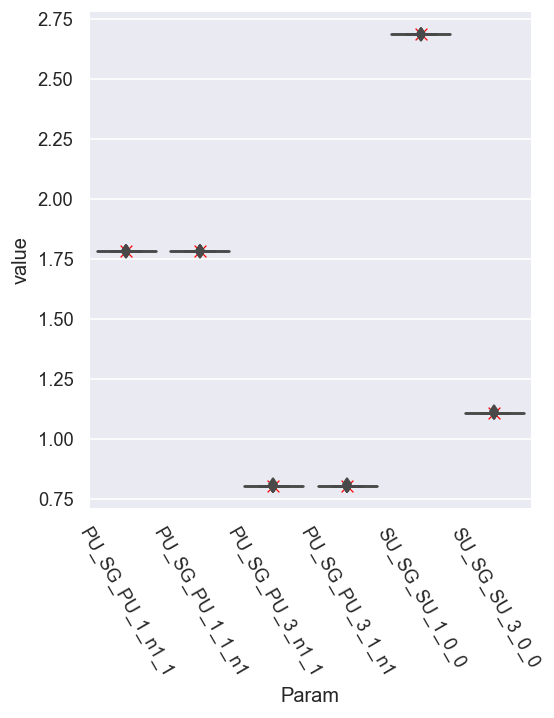

In [109]:
# With masking for best fits only
pType = 'm'
# mask = dfLong['redchi']<1e-5
mask = dfLong['pGroups']=='A'

# g = sns.catplot(x='Param', y='value', hue = 'Type', data = dfLong[mask].reset_index(), kind='box')
# g = sns.catplot(x='Param', y='value', hue = 'redchi', data = dfLong[mask].xs('m',level=1).reset_index(), kind='box')  # TODO: fix cmapping here to allow sub-cat
g = sns.catplot(x='Param', y='value', data = dfLong[mask].xs(pType,level=1).reset_index(), kind='box') # With mask
# g = sns.catplot(x='Param', y='value', row='pGroups', data = dfLong.xs(pType,level=1).reset_index(), kind='box')  # Rows
g.set_xticklabels(rotation=-60)

# Add ref case
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=50)

For parameter set A, things look excellent for the magnitudes.

<AxesSubplot:xlabel='Param', ylabel='value'>

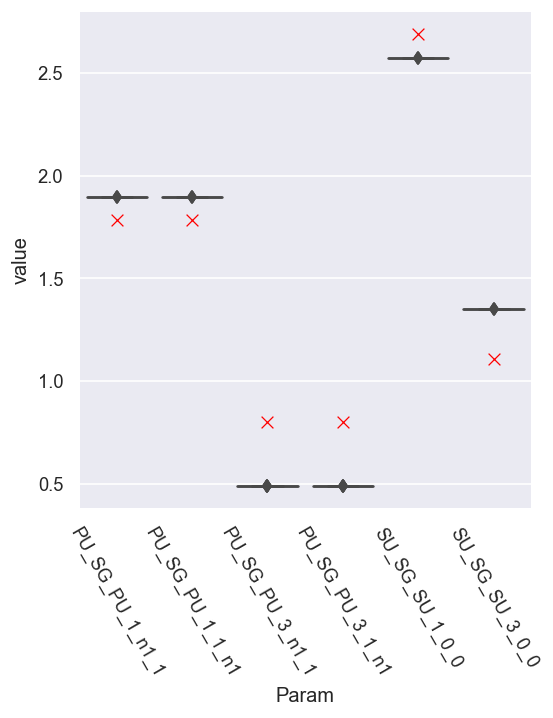

In [110]:
# With masking for best fits only
pType = 'm'
# mask = dfLong['redchi']<1e-5
mask = dfLong['pGroups']=='E'

# g = sns.catplot(x='Param', y='value', hue = 'Type', data = dfLong[mask].reset_index(), kind='box')
# g = sns.catplot(x='Param', y='value', hue = 'redchi', data = dfLong[mask].xs('m',level=1).reset_index(), kind='box')  # TODO: fix cmapping here to allow sub-cat
g = sns.catplot(x='Param', y='value', data = dfLong[mask].xs(pType,level=1).reset_index(), kind='box') # With mask
# g = sns.catplot(x='Param', y='value', row='pGroups', data = dfLong.xs(pType,level=1).reset_index(), kind='box')  # Rows
g.set_xticklabels(rotation=-60)

# Add ref case
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=50)

For the next-best candidates, set E, the spread in the parameters is small, but the values are a bit off from the reference case.

We can also plot all the data to get a better comparison...

<AxesSubplot:xlabel='Param', ylabel='value'>

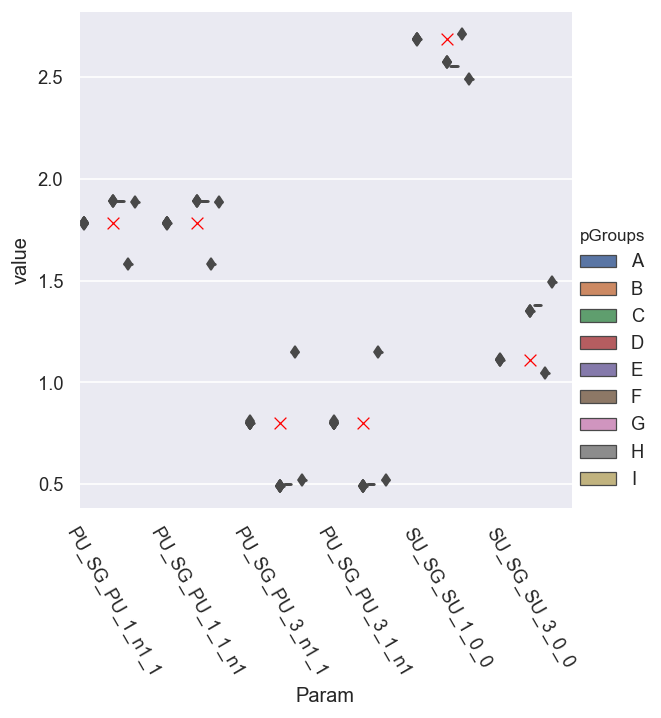

In [111]:
# With masking for best fits only
pType = 'm'
# mask = dfLong['redchi']<1e-5
# mask = dfLong['pGroups']=='E'

# g = sns.catplot(x='Param', y='value', hue = 'Type', data = dfLong[mask].reset_index(), kind='box')
# g = sns.catplot(x='Param', y='value', hue = 'redchi', data = dfLong[mask].xs('m',level=1).reset_index(), kind='box')  # TODO: fix cmapping here to allow sub-cat
g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = dfLong.xs(pType,level=1).reset_index(), kind='box') # With mask
# g = sns.catplot(x='Param', y='value', row='pGroups', data = dfLong.xs(pType,level=1).reset_index(), kind='box')  # Rows
g.set_xticklabels(rotation=-60)

# Add ref case
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=50)

This needs some work - but does show that the spread in the magnitudes is generally small... whilst those in the phases are large...

<AxesSubplot:xlabel='Param', ylabel='value'>

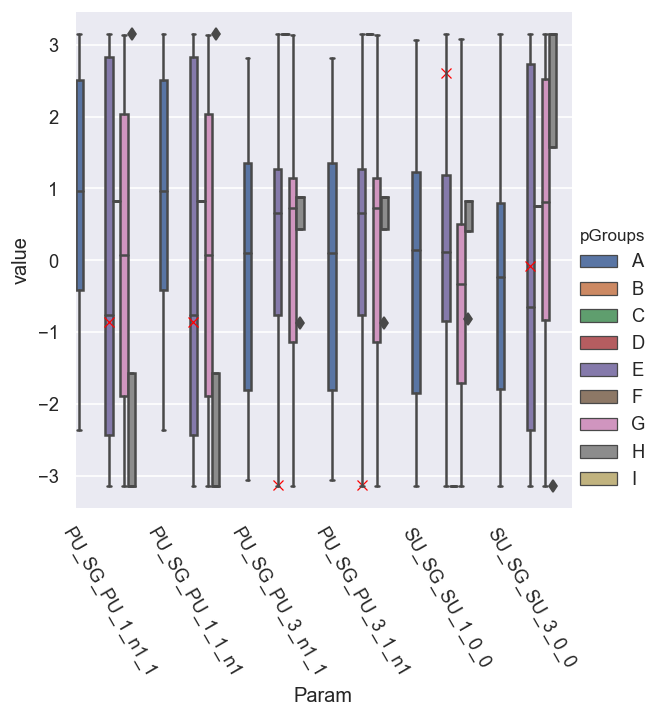

In [113]:
# With masking for best fits only
pType = 'p'
# mask = dfLong['redchi']<1e-5
# mask = dfLong['pGroups']=='E'

# g = sns.catplot(x='Param', y='value', hue = 'Type', data = dfLong[mask].reset_index(), kind='box')
# g = sns.catplot(x='Param', y='value', hue = 'redchi', data = dfLong[mask].xs('m',level=1).reset_index(), kind='box')  # TODO: fix cmapping here to allow sub-cat
g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = dfLong.xs(pType,level=1).reset_index(), kind='box') # With mask
# g = sns.catplot(x='Param', y='value', row='pGroups', data = dfLong.xs(pType,level=1).reset_index(), kind='box')  # Rows
g.set_xticklabels(rotation=-60)

# Add ref case
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red')

### Set reference phase

In this case - with a randomised ref phase - to get the corrected (relative) fitted phase results, a reference needs to be set. (Note this can also be set for the initial fit, rather than during post-fit analysis - results should be identical.)



In [136]:
# Phase correction/shift function

def phaseCorrection(dfWide, dfRef = None, refParam = None, wrapFlag = True):
    """
    Phase correction/shift/wrap function. 
    
    Prototype from test code:
    
    - Assumes full Pandas tabulated wide-form dataset as input.
    - Supply dfRef to use reference phase (abs phase values), otherwise will be relative with refParam set to zero.
    - wrapFlag: wrap to -pi:pi range? Default True.
    
    """
    
    phasesIn = dfWide['value'].xs('p',level=1)  # Set phase data
    phaseCorr = phasesIn.copy()
    
#     print(refParam)
    
    if refParam is None:
        refParam = phasesIn.columns[0]  # Default ref phase
        
    refPhase = dfWide['value', refParam].xs('p',level=1)
#     print(refPhase)
    
    # For abs ref phase, set that too
#     absFlag = False
    if dfRef is not None:
        refPhase = refPhase - dfRef[dfRef['Param'] == refParam].xs('p',level=1)['value'].item()
#         absFlag = True
    
    print(f"Set ref param = {refParam}")
        
    # Substract (shift) by refPhase
    phaseCorr = phaseCorr.subtract(refPhase, axis='index')  # Subtract ref phase, might be messing up sign here?
    
    # Rectify phases...? Defined here for -pi:pi range.
    if wrapFlag:
        # phaseCorrRec = phaseCorr.apply(lambda x: np.sign(x)*np.mod(np.abs(x),np.pi)) # This will wrap towards zero, should be OK for zero ref phase case.
 
        # Use arctan, defined for -pi:pi range
        return np.arctan2(np.sin(phaseCorr), np.cos(phaseCorr))

        
    else:
        return phaseCorr

    
    

This defaults to setting the first phase term as the reference...

In [134]:
phaseCorrection(dfWide)

Set ref param = PU_SG_PU_1_1_n1


Param        PU_SG_PU_1_1_n1  PU_SG_PU_1_n1_1  PU_SG_PU_3_1_n1  \
Fit pGroups                                                      
0   E                    0.0              0.0         2.385985   
1   G                    0.0              0.0        -3.967418   
2   G                    0.0              0.0         3.967417   
3   E                    0.0              0.0        -3.897202   
4   G                    0.0              0.0        -2.315762   
...                      ...              ...              ...   
94  E                    0.0              0.0        -2.385983   
95  E                    0.0              0.0         2.385983   
96  E                    0.0              0.0         3.897201   
97  E                    0.0              0.0        -2.385984   
98  G                    0.0              0.0        -2.315761   

Param        PU_SG_PU_3_n1_1  SU_SG_SU_1_0_0  SU_SG_SU_3_0_0  
Fit pGroups                                                   
0   E               2.385985        2.295923        6.179950  
1   G              -3.967418       -2.772066       -5.963522  
2   G               3.967417        2.772063       -0.319630  
3   E              -3.897202       -3.987262       -0.103235  
4   G              -2.315762       -3.511114       -0.319602  
...                      ...             ...             ...  
94  E              -2.385983       -2.295923       -6.179951  
95  E               2.385983        2.295923        6.179950  
96  E               3.897201        3.987262        0.103235  
97  E              -2.385984       -2.295923        0.103235  
98  G              -2.315761       -3.511111       -0.319613  

[91 rows x 6 columns]

In general, one would set the ref. phase to zero but, for a known test case, we can also set it to the known input (reference) phase.

In [132]:
phaseCorrection(dfWide, dfRef = dfRef, refParam = 'PU_SG_PU_1_n1_1')

Set ref param = PU_SG_PU_1_n1_1


Param        PU_SG_PU_1_1_n1  PU_SG_PU_1_n1_1  PU_SG_PU_3_1_n1  \
Fit pGroups                                                      
0   E              -0.861041        -0.861041         1.524943   
1   G              -0.861041        -0.861041        -4.828460   
2   G              -0.861041        -0.861041         3.106375   
3   E              -0.861041        -0.861041        -4.758243   
4   G              -0.861041        -0.861041        -3.176804   
...                      ...              ...              ...   
94  E              -0.861041        -0.861041        -3.247025   
95  E              -0.861041        -0.861041         1.524942   
96  E              -0.861041        -0.861041         3.036160   
97  E              -0.861041        -0.861041        -3.247025   
98  G              -0.861041        -0.861041        -3.176802   

Param        PU_SG_PU_3_n1_1  SU_SG_SU_1_0_0  SU_SG_SU_3_0_0  
Fit pGroups                                                   
0   E               1.524943        1.434882        5.318908  
1   G              -4.828460       -3.633107       -6.824564  
2   G               3.106375        1.911022       -1.180671  
3   E              -4.758243       -4.848303       -0.964276  
4   G              -3.176804       -4.372156       -1.180644  
...                      ...             ...             ...  
94  E              -3.247025       -3.156964       -7.040992  
95  E               1.524942        1.434882        5.318909  
96  E               3.036160        3.126221       -0.757807  
97  E              -3.247025       -3.156964       -0.757807  
98  G              -3.176802       -4.372153       -1.180654  

[91 rows x 6 columns]

Set ref param = PU_SG_PU_1_1_n1


(-10.02477796076938, 10.02477796076938)

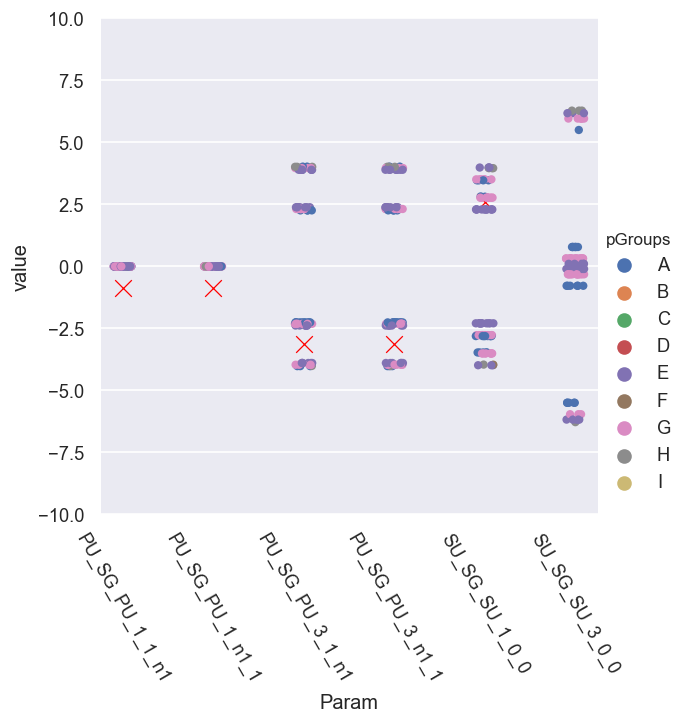

In [141]:
# Full phase spread, without wrapping
phaseCorr = phaseCorrection(dfWide, wrapFlag = False)

pType = 'p'

# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit']), kind='box')  # .melt() to force long-format
# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
# g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']))  # pGroups + scatter plot - this shows groupings better
g.set_xticklabels(rotation=-60)

# Add ref case - note this may rescale y-axis as set
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=100)  #, size = 10)

# Force limits
padding = 0.2
mult = 3
plt.ylim(mult*(-np.pi-padding), mult*(np.pi+padding))

Set ref param = PU_SG_PU_1_1_n1


(-10.02477796076938, 10.02477796076938)

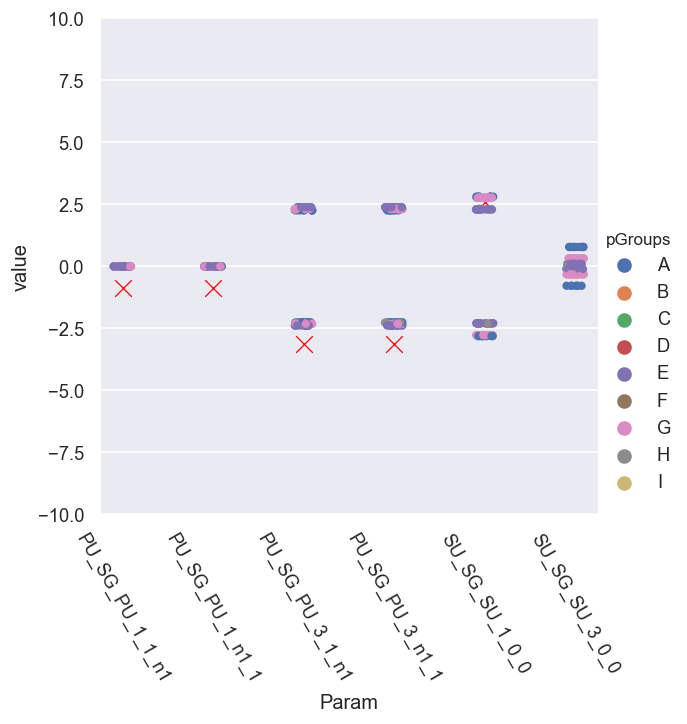

In [142]:
# Full phase spread, WITH WRAPPING (default case)
phaseCorr = phaseCorrection(dfWide, wrapFlag = True)

pType = 'p'

# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit']), kind='box')  # .melt() to force long-format
# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
# g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']))  # pGroups + scatter plot - this shows groupings better
g.set_xticklabels(rotation=-60)

# Add ref case - note this may rescale y-axis as set
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=100)  #, size = 10)

# Force limits
padding = 0.2
mult = 3
plt.ylim(mult*(-np.pi-padding), mult*(np.pi+padding))

Set ref param = PU_SG_PU_1_1_n1


(-3.3415926535897933, 3.3415926535897933)

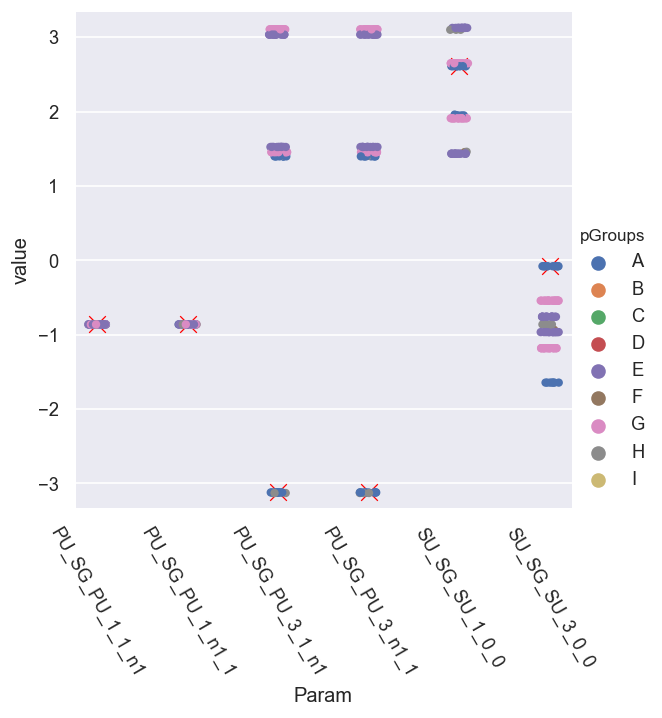

In [144]:
# Full phase spread, WITH WRAPPING (default case) + set ref phase from known value
phaseCorr = phaseCorrection(dfWide, dfRef, wrapFlag = True)

pType = 'p'

# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit']), kind='box')  # .melt() to force long-format
# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
# g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']))  # pGroups + scatter plot - this shows groupings better
g.set_xticklabels(rotation=-60)

# Add ref case - note this may rescale y-axis as set
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=100)  #, size = 10)

# Force limits
padding = 0.2
mult = 1
plt.ylim(mult*(-np.pi-padding), mult*(np.pi+padding))

Here it looks like we have - roughly - sets of phase groups, symmetric relative to the ref. cases...

What's going on...?

- Issue with rectification?
- Insensitivity to phases? (Periodicity in $\chi^2$.)
- Unsigned phases? (Periodicity in $\chi^2$.)
- Not enough sampling?

Let's look at the correlations to see if they show anything interesting...

Looking in more detail, for set A only...

Set ref param = PU_SG_PU_1_1_n1


(-3.3415926535897933, 3.3415926535897933)

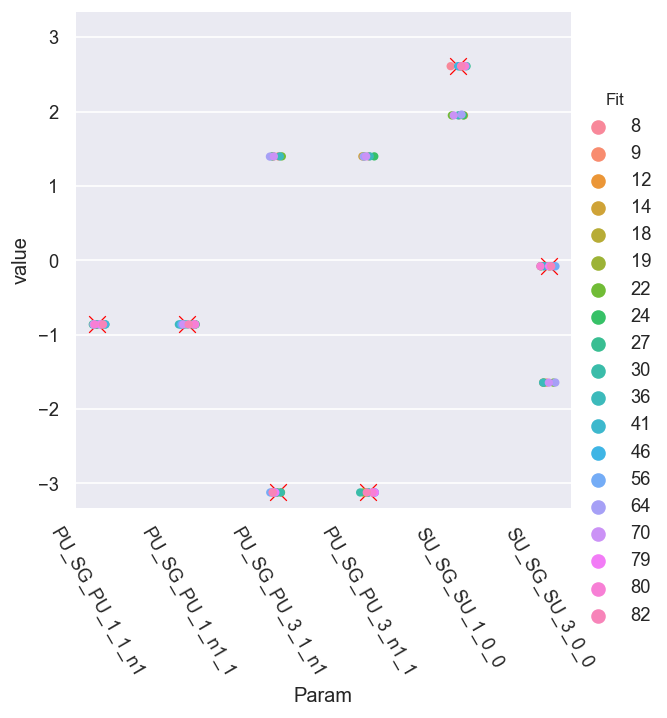

In [152]:
# Full phase spread, WITH WRAPPING (default case) + set ref phase from known value
phaseCorr = phaseCorrection(dfWide, dfRef, wrapFlag = True)

pType = 'p'

# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit']), kind='box')  # .melt() to force long-format
# g = sns.catplot(x='Param', y='value', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
# g = sns.catplot(x='Param', y='value', hue = 'pGroups', data = phaseCorr.reset_index().melt(id_vars=['Fit','pGroups']), kind='box')  # For pGroups case
g = sns.catplot(x='Param', y='value', hue = 'Fit', data = phaseCorr.xs('A', level=1).reset_index().melt(id_vars=['Fit']))  # pGroups + scatter plot - this shows groupings better
g.set_xticklabels(rotation=-60)

# Add ref case - note this may rescale y-axis as set
# sns.scatterplot(x='Param', y='value', hue = 'Type', style = 'Type', data = dfRef.reset_index(), legend=False)
sns.scatterplot(x='Param', y='value', data = dfRef.xs(pType,level=1).reset_index(), legend=False, marker = 'x', color='red', s=100)  #, size = 10)

# Force limits
padding = 0.2
mult = 1
plt.ylim(mult*(-np.pi-padding), mult*(np.pi+padding))

This looks promising - there seem to be two correlated sets of solutions.

We can also look at the pair plots to see the solution set correlations in more detail:

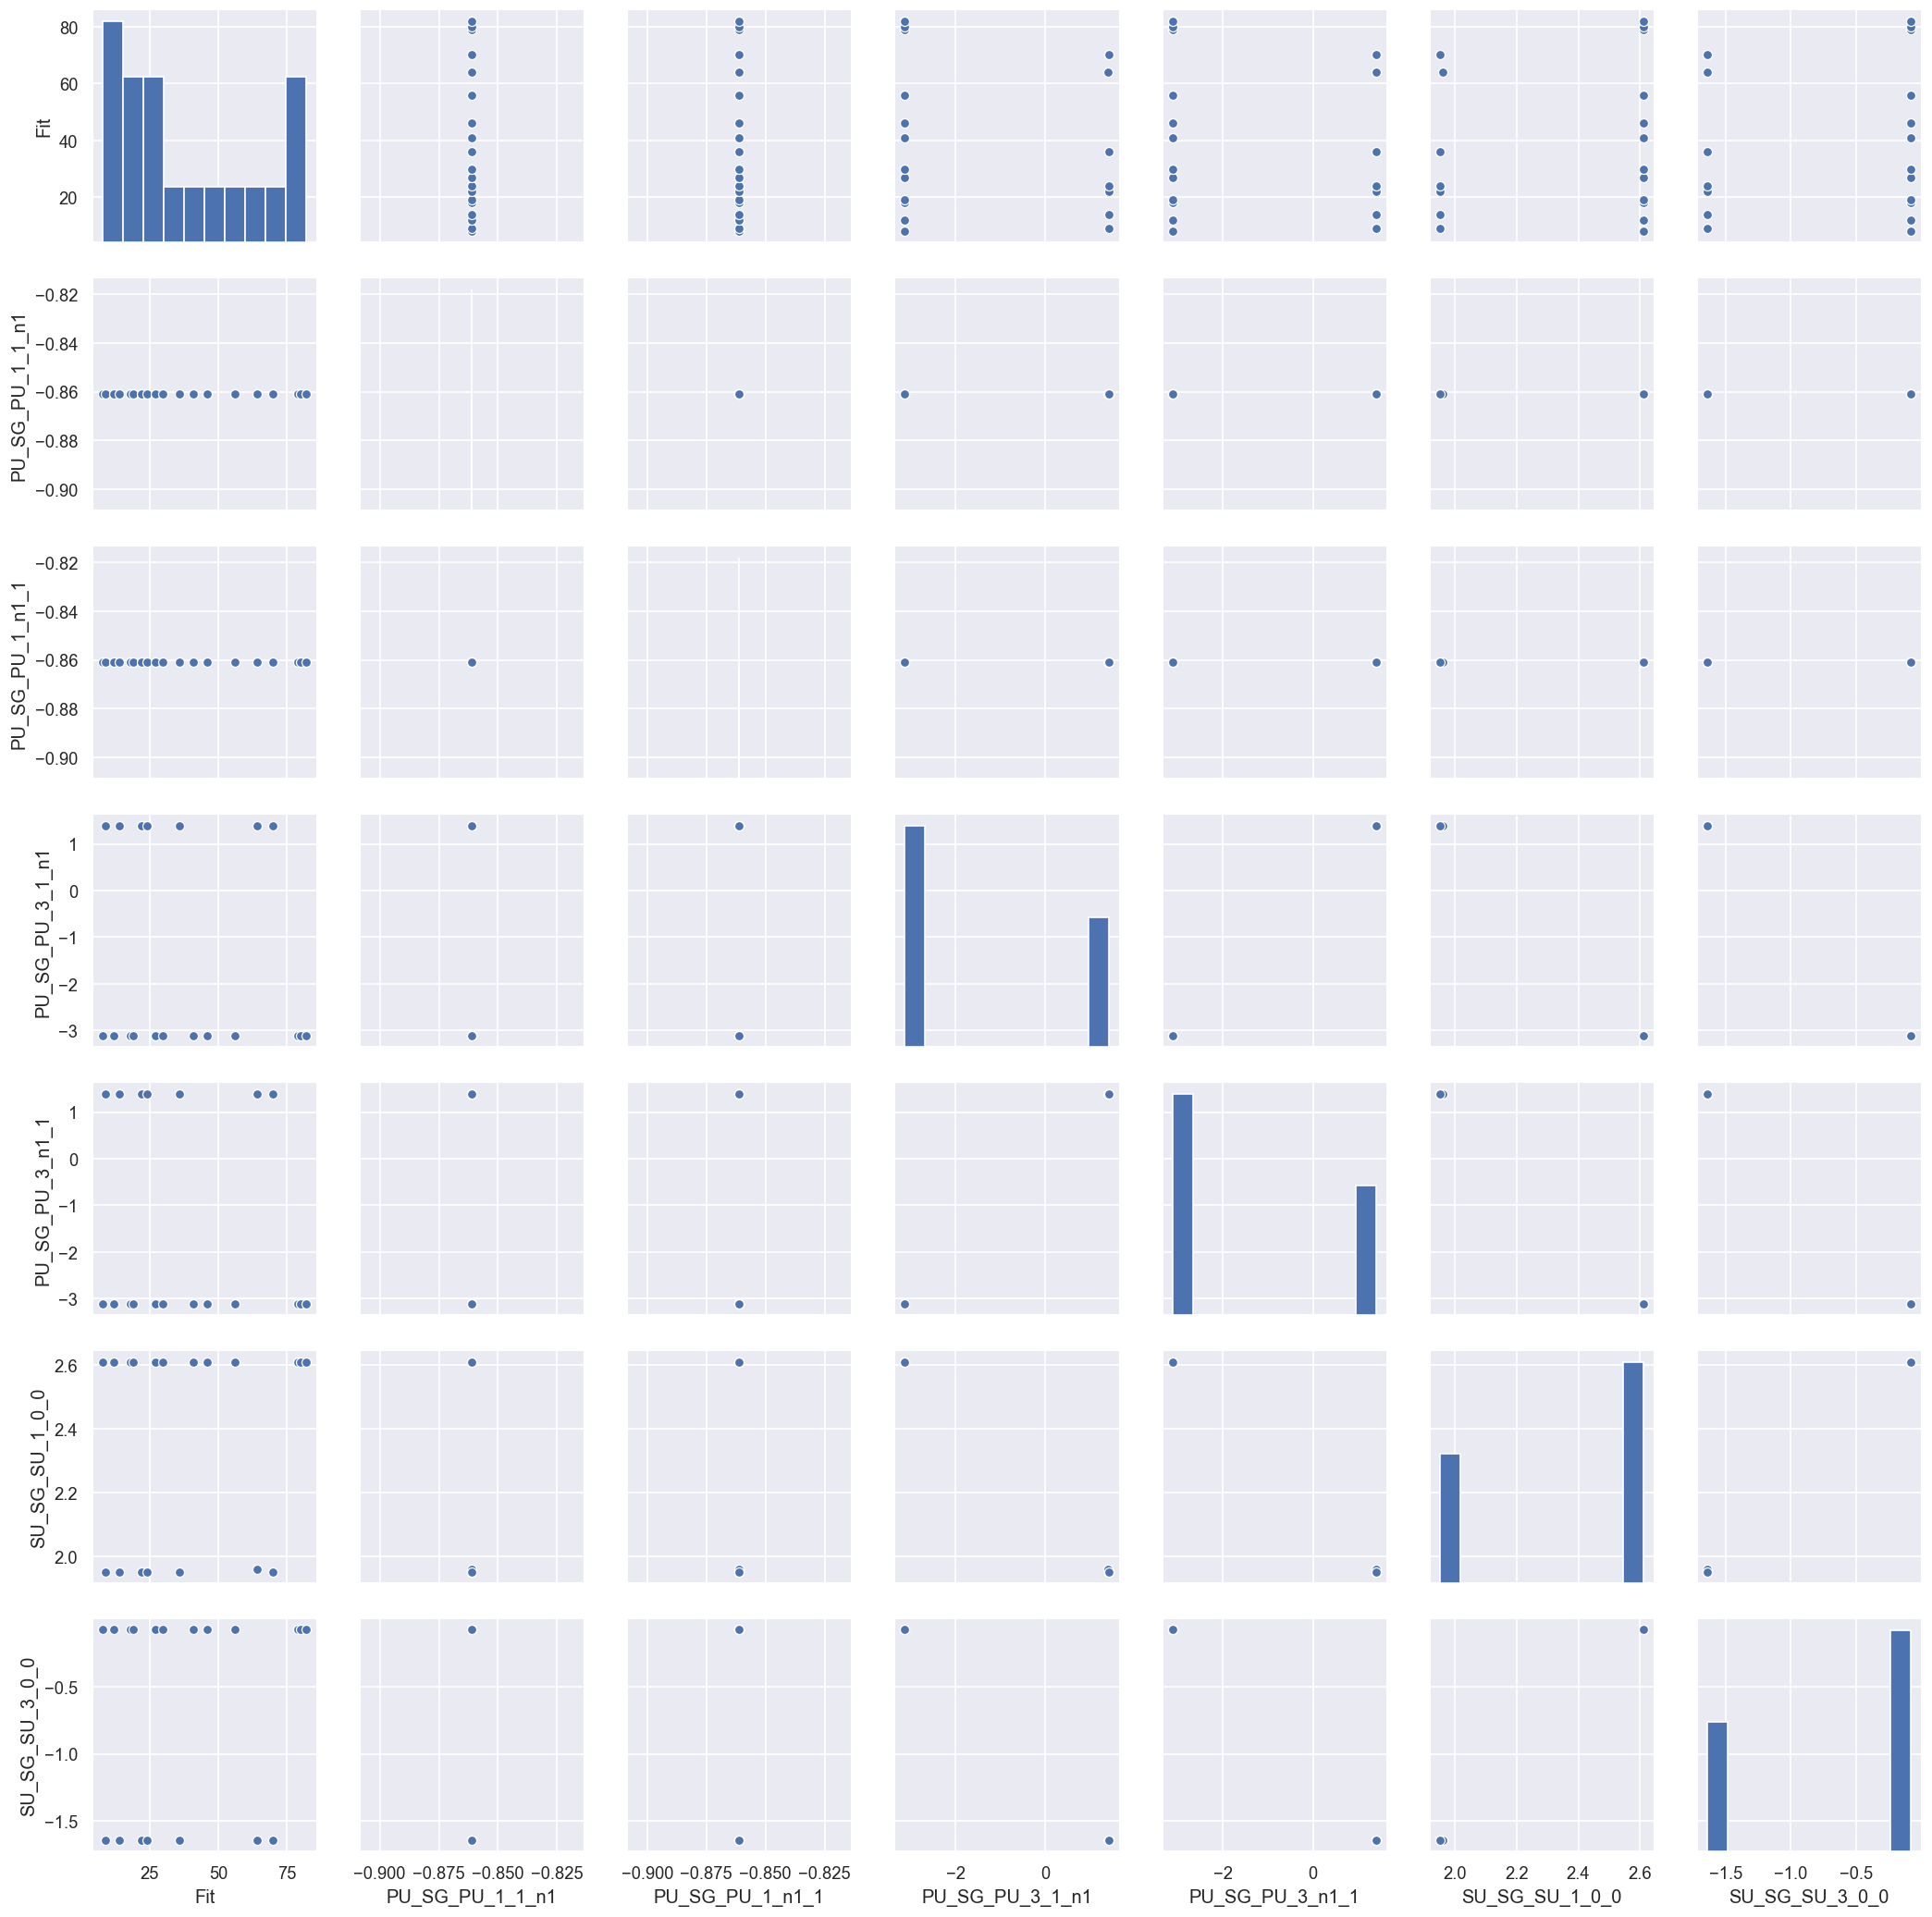

In [147]:
sns.pairplot(phaseCorr.xs('A', level=1).reset_index())  #, hue='Fit') 

In [153]:
# Full set
# phaseCorr.xs('A', level=1)  #['PU_SG_PU_3_1_n1']

# Inspect unique value sets
# phaseCorrRec.xs('A', level=1).apply(np.round)  #.drop_duplicates()
phaseCorr.xs('A', level=1).apply(lambda x: np.round(x,4)).drop_duplicates()  # Get 7 sets returned down to 4 d.p. Fit 12 matches ref. values

Param  PU_SG_PU_1_1_n1  PU_SG_PU_1_n1_1  PU_SG_PU_3_1_n1  PU_SG_PU_3_n1_1  \
Fit                                                                         
8               -0.861           -0.861          -3.1204          -3.1204   
9               -0.861           -0.861           1.3984           1.3984   
64              -0.861           -0.861           1.3957           1.3957   

Param  SU_SG_SU_1_0_0  SU_SG_SU_3_0_0  
Fit                                    
8              2.6112         -0.0787  
9              1.9499         -1.6434  
64             1.9604         -1.6421

This now starts to make sense... the results are showing pairs of best solutions in phase space.  This is actually a good indication that the fitting routine is probing the full solution space, and things are working properly: 

- As expected, the `PU_SG_PU_1*` variables are correlated, since this was defined for the fitting, and they take only a single value, since they were set as the reference case.
- The `PU_SG_PU_3*` pair show mirror symmetry about the reference pair, with a +ve and -ve solution found.
- There are three sets of `SU_SG_SU*` solutions, correlated with the +/- solutions, although two of the "unique" solutions are very close, and can be essentially regarded as defining the uncertainty in this case.
- The `SU_SG_SU_1_0_0` solution pair seems to break the mirror symmetry (about the reference phase), but this is simply due to the wrapping of the -ve solution.

Why do we see this?  For a cylindrically symmetric problem the sign of the phases is not defined, hence symmetric phase groups $\hat{\phi_{\Gamma}} = \pm|\phi_{ref}\pm\phi_{\Gamma}|$ are therefore expected in this case, and these will produce identical results.
 
So, in this case, we find two good (valid) solution sets from an intial trial run of 100 fits, using 10 data points. 

For this test case, it was easy to find these, since the $\chi^2$ values were significantly lower than other candidate sets, but in general this may not be the case, and additional tests might be required, e.g. adding additional data points or testing via independent measurements. This will be explored further in the *bootstrapping* notebook (to follow), along with effects of noise etc.




## Versions

In [154]:
import scooby
scooby.Report(additional=['epsproc', 'pemtk', 'xarray', 'jupyter'])

--------------------------------------------------------------------------------
  Date: Thu Jun 24 11:03:34 2021 Eastern Daylight Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.3.0-dev
             pemtk : 0.0.1
            xarray : 0.15.0
           jupyter : Version unknown
             numpy : 1.19.2
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

In [155]:
# Check current Git commit for local ePSproc version
!git -C {Path(ep.__file__).parent} branch
!git -C {Path(ep.__file__).parent} log --format="%H" -n 1

* dev
  master
  numba-tests
da12376cc36f640d8974f5ce2c121be3d391caab


In [156]:
# Check current remote commits
!git ls-remote --heads git://github.com/phockett/ePSproc
# !git ls-remote --heads git://github.com/phockett/epsman

16cfad26e658b740f267baa89d1550336b0134bf	refs/heads/dev
82d12cf35b19882d4e9a2cde3d4009fe679cfaee	refs/heads/master
69cd89ce5bc0ad6d465a4bd8df6fba15d3fd1aee	refs/heads/numba-tests
ea30878c842f09d525fbf39fa269fa2302a13b57	refs/heads/revert-9-master
